In [1]:
import os
os.chdir( "/Users/etmu9498/research/code/scripts")
import cloud_height
import make_plots
import matplotlib.pyplot as plt

In [2]:
# update font sizes for this plot!
SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 5000

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# not actually working for some reason??
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [3]:
crl_path = "/Users/etmu9498/research/data/CRL_data/2021"
crl_list = make_plots.load_crl( crl_path)
crl_name = crl_list[ 16]

crl data files:
0) P3_20210811H1_200000-224759.cdf
1) P3_20210812H1_095513-125927.cdf
2) P3_20210812H2_212248-235510.cdf
3) P3_20210813H1_091801-113558.cdf
4) P3_20210816H1_085245-123459.cdf
5) P3_20210816H1_090000-102359.cdf
6) P3_20210817H1_094204-132058.cdf
7) P3_20210818H1_211425-244159.cdf
8) P3_20210819H1_213003-244159.cdf
9) P3_20210820H1_212402-245958.cdf
10) P3_20210821H2_213903-225658.cdf
11) P3_20210821H2_213903-262058.cdf
12) P3_20210827H1_203112-275220.cdf
13) P3_20210828H1_200115-221321.cdf
14) P3_20210829H1_171201-223719.cdf
15) P3_20210925H1_211201-243558.cdf
16) P3_20210926H1_220900-255058.cdf
17) P3_20210927H1_213003-253558.cdf
18) P3_20210929H2_211201-261159.cdf


labels are set


C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
<timed exec>:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


CPU times: total: 8.42 s
Wall time: 8.44 s


<Figure size 432x288 with 0 Axes>

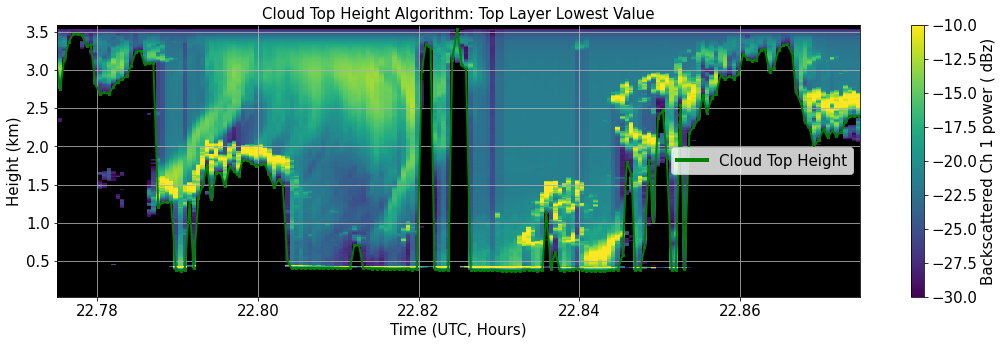

In [4]:
%%time
x_lims = [22.775, 22.875] # crl dataset 16, time
# x_lims = [21.5, 21.7] # crl dataset 18 eye 1, time
# x_lims = [-58, -57] # crl dataset 18 eye 1, lon

print( 'labels are set')

xaxis = 'time'
cloud_height.cloud_height_crl_comparison( crl_name, cutoff_power=-30, i1= 0, i2= 1600, same_plot=True, xaxis = xaxis, xlims= x_lims)

plt.title( 'Cloud Top Height Algorithm: Top Layer Lowest Value')
plt.xlabel( 'Time (UTC, Hours)')

os.chdir( "/Users/etmu9498/research/figures/cloud-tops")
plt.savefig( "Top Layer Lowest Value.png" , dpi=300)
            

C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


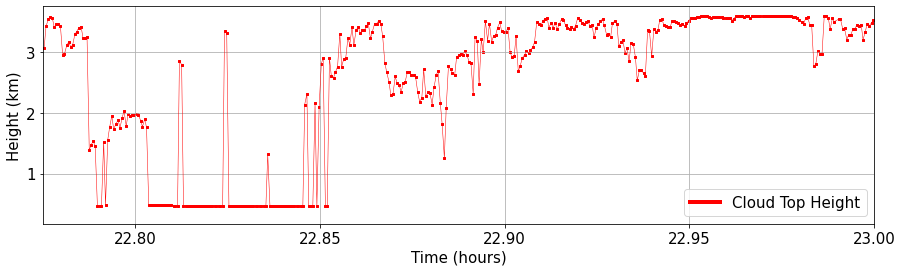

In [5]:
H, time = cloud_height.find_cloud_heights(crl_name, -30, i1=0, i2=1600)

# plot results
plt.figure( figsize=(14.9, 4))
plt.scatter( time, H, c= 'r', s=8, marker='s')
plt.plot( time, H, c= 'r', linewidth=.5, label= 'Cloud Top Height')

plt.grid('on')
plt.ylabel( 'Height (km)')
plt.xlabel( 'Time (hours)')
# plt.xlim( [22.5, 22.7]) # crl dataset 16
plt.xlim( [22.775, 23.0]) # crl dataset 18

# make lines in legend thicker
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(4.0)

C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


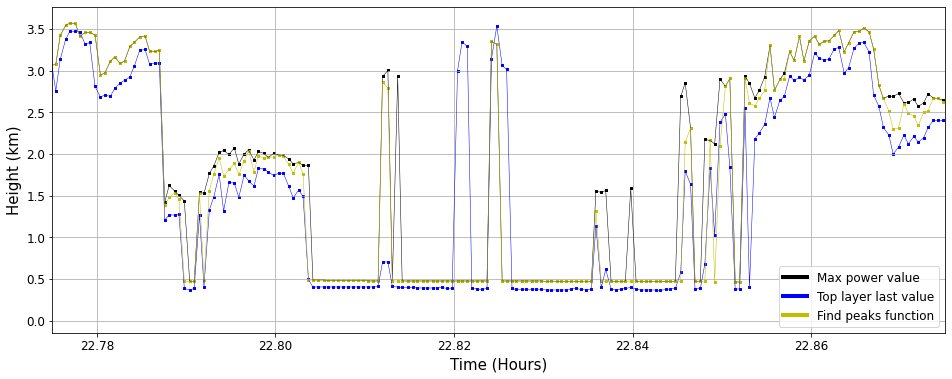

In [10]:
# compare different algorithms used to find cloud heights!! 

time, H_max, H_top_layer, H_lowest_layer, H_find_peaks = cloud_height.algorithm_comparison( crl_name, -30)

H_list = [ H_max, H_top_layer, H_find_peaks] # leaving H_lowest_layer algorithm results out for this figure
# xlims = [22.6, 22.7] # crl dataset 16
xlims = [22.775, 22.875] # crl dataset 18

colors = ['k', 'b', 'y']
labels = [ 'Max power value', 'Top layer last value', 'Find peaks function'] # 'lowest value'

plt.figure( figsize=(16, 6))
plt.ylabel( "Height (km)")
plt.grid('on')
# make_plots.plot_power_ch1( crl_path, crl_name, 0, 6000, 'time', cutoff= -30)
plt.xlim( [ xlims[0], xlims[1] ])
plt.xlabel( 'Time (Hours)')
        

for i in range( len( H_list)):
    plt.scatter( time, H_list[i], c= colors[i], s=8, marker='s')
    plt.plot( time, H_list[i], c= colors[i], linewidth=.5, label= labels[i])

# make lines in legend thicker
leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(4.0)


C:\Users\etmu9498\Anaconda3\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
C:\Users\etmu9498\Anaconda3\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


<Figure size 432x288 with 0 Axes>

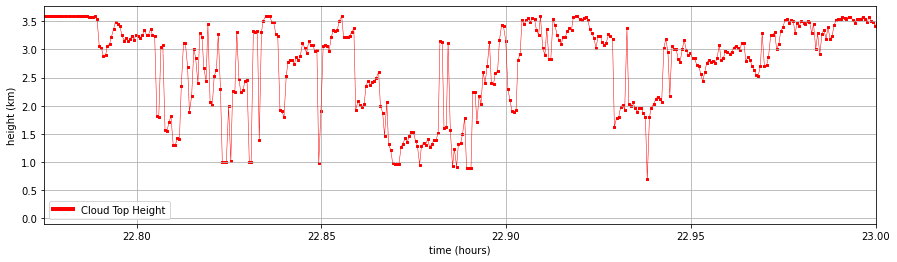

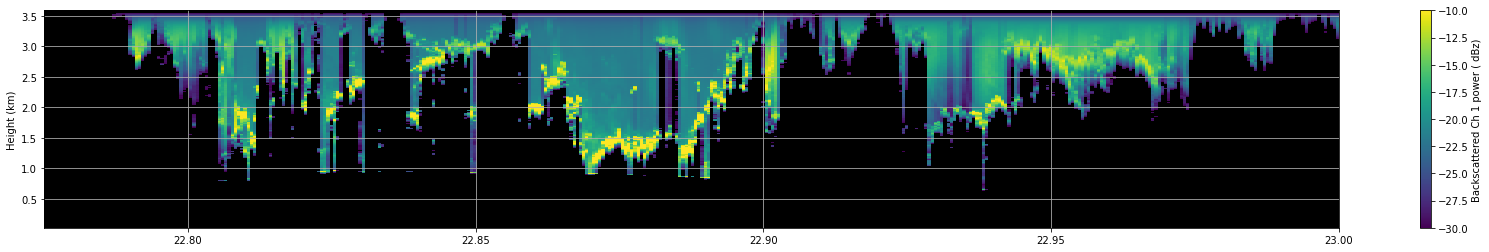

<Figure size 432x144 with 0 Axes>

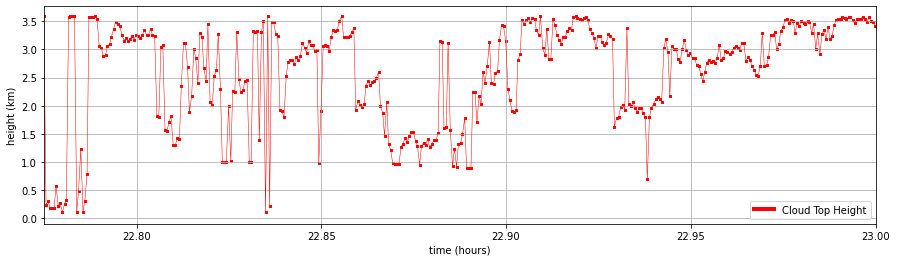

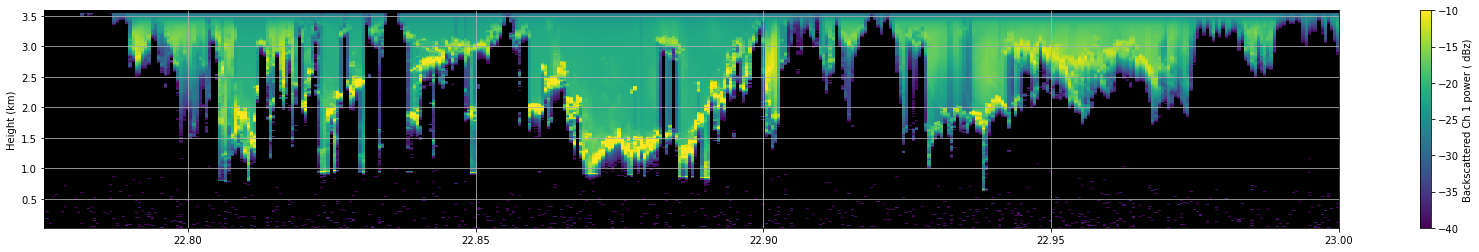

In [6]:
# this example only really works with crl dataset 16! And when find_cloud_heights is using the max value or find peaks algorithms

# xlims = [22.5, 22.7] # crl dataset 16
# xlims = [24.5, 24.6] # crl_dataset 17
xlims = [22.775, 23.0]

cloud_height.cloud_height_crl_comparison( crl_name, -30, xlims, same_plot=False)

f,ax = plt.subplots()
f.set_visible(False)
f.set_figheight(2) # figure height in inches

# there is still an issue with underestimation of cloud top heights when using -40 dBz as a cutoff... maybe change algorithm
# in cloud_height.find_cloud_heights script?
cloud_height.cloud_height_crl_comparison( crl_name, -40, xlims, same_plot=False)

C:\Users\etmu9498\Anaconda3\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
C:\Users\etmu9498\Anaconda3\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


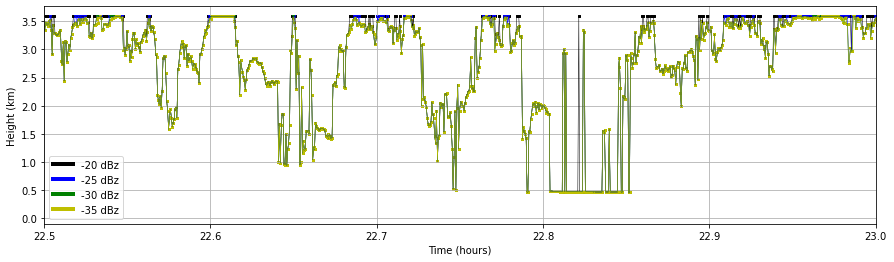

In [4]:
# cycle through four different power cutoffs
cutoff_list = [ -20, -25, -30, -35]  # dBz
colors = ['k', 'b', 'g', 'y']
labels = [ '-20 dBz', '-25 dBz', '-30 dBz', '-35 dBz']
xlims = [24.5, 24.6]
xlims = [22.5, 23.0]

cloud_height.cloud_height_sensitivity( crl_name, cutoff_list, xlims, colors, labels)